Read from: https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/active-fire-data

In [1]:
import fiona
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = fiona.collection('./support/MODIS_C6_USA_contiguous_and_Hawaii_24h.shp')
data    

<open Collection './support/MODIS_C6_USA_contiguous_and_Hawaii_24h.shp:MODIS_C6_USA_contiguous_and_Hawaii_24h', mode 'r' at 0x7f4a8710aa90>

In [3]:
len(data)

922

In [4]:
data[0]

{'geometry': {'coordinates': (-111.865, 34.972), 'type': 'Point'},
 'id': '0',
 'properties': OrderedDict([('LATITUDE', 34.972),
              ('LONGITUDE', -111.865),
              ('BRIGHTNESS', 301.1),
              ('SCAN', 2.5),
              ('TRACK', 1.5),
              ('ACQ_DATE', '2018-09-17'),
              ('ACQ_TIME', '0500'),
              ('SATELLITE', 'T'),
              ('CONFIDENCE', 30),
              ('VERSION', '6.0NRT'),
              ('BRIGHT_T31', 290.7),
              ('FRP', 14.1),
              ('DAYNIGHT', 'N')]),
 'type': 'Feature'}

In [7]:
tmp_array = []

for point in data:
    tmp_array.append(point['geometry']['coordinates'])
        
array = np.array(tmp_array)

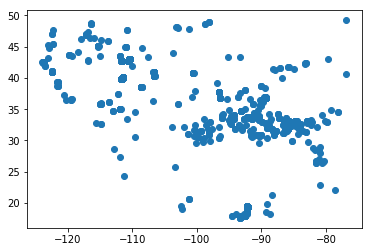

In [8]:
plt.figure()
plt.scatter(array[:,0], array[:,1])

In [9]:
import matplotlib.patches as mpatches
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

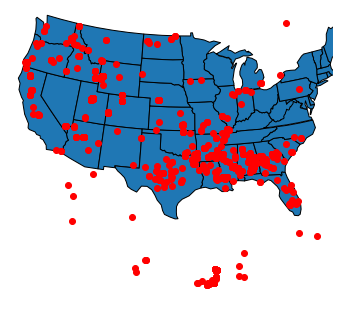

In [10]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                        category='cultural', name=shapename)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

r = shpreader.Reader(states_shp)

for rec, geom in zip(r.records(), r.geometries()):
    edgecolor = 'black'
    facecolor = None
    if rec.attributes['name'] in ['Alaska', 'Hawaii']:
        continue
    ax.add_geometries([geom], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
    
plt.scatter(array[:,0], array[:,1], color='r', zorder=2, transform=ccrs.Geodetic())

In [16]:
import geopandas as gp
import shapely

In [17]:
point

{'geometry': {'coordinates': (-120.659, 37.332), 'type': 'Point'},
 'id': '921',
 'properties': OrderedDict([('LATITUDE', 37.332),
              ('LONGITUDE', -120.659),
              ('BRIGHTNESS', 320.8),
              ('SCAN', 1.7),
              ('TRACK', 1.3),
              ('ACQ_DATE', '2018-09-18'),
              ('ACQ_TIME', '1920'),
              ('SATELLITE', 'T'),
              ('CONFIDENCE', 70),
              ('VERSION', '6.0NRT'),
              ('BRIGHT_T31', 302.8),
              ('FRP', 22.8),
              ('DAYNIGHT', 'D')]),
 'type': 'Feature'}

In [18]:
properties = []

for point in data:
    properties.append(point['properties'].values())
        
df = gp.GeoDataFrame(properties, columns=point['properties'].keys())
df

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT
0,34.972,-111.865,301.1,2.5,1.5,2018-09-17,0500,T,30,6.0NRT,290.7,14.1,N
1,34.992,-111.876,309.2,2.5,1.5,2018-09-17,0500,T,68,6.0NRT,290.8,35.3,N
2,34.986,-111.904,305.9,2.6,1.5,2018-09-17,0500,T,45,6.0NRT,290.9,25.7,N
3,34.999,-111.908,312.5,2.6,1.5,2018-09-17,0500,T,71,6.0NRT,288.9,43.1,N
4,37.462,-112.235,302.4,2.3,1.5,2018-09-17,0500,T,49,6.0NRT,287.2,21.9,N
5,38.555,-108.674,306.2,1.4,1.2,2018-09-17,0500,T,67,6.0NRT,285.5,14.8,N
6,38.586,-108.723,302.5,1.4,1.2,2018-09-17,0500,T,50,6.0NRT,285.3,10.6,N
7,40.229,-106.636,311.2,1.1,1.0,2018-09-17,0500,T,82,6.0NRT,284.2,14.5,N
8,40.274,-106.579,306.1,1.1,1.0,2018-09-17,0500,T,54,6.0NRT,286.1,10.4,N
9,40.268,-106.616,306.5,1.1,1.0,2018-09-17,0500,T,47,6.0NRT,284.8,10.3,N


In [19]:
df['geometry'] = df.apply(lambda row: shapely.geometry.Point(row["LONGITUDE"], row["LATITUDE"]), axis=1)
df.crs = {'init' :'epsg:4326'}
df

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
0,34.972,-111.865,301.1,2.5,1.5,2018-09-17,0500,T,30,6.0NRT,290.7,14.1,N,POINT (-111.865 34.972)
1,34.992,-111.876,309.2,2.5,1.5,2018-09-17,0500,T,68,6.0NRT,290.8,35.3,N,POINT (-111.876 34.992)
2,34.986,-111.904,305.9,2.6,1.5,2018-09-17,0500,T,45,6.0NRT,290.9,25.7,N,POINT (-111.904 34.986)
3,34.999,-111.908,312.5,2.6,1.5,2018-09-17,0500,T,71,6.0NRT,288.9,43.1,N,POINT (-111.908 34.999)
4,37.462,-112.235,302.4,2.3,1.5,2018-09-17,0500,T,49,6.0NRT,287.2,21.9,N,POINT (-112.235 37.462)
5,38.555,-108.674,306.2,1.4,1.2,2018-09-17,0500,T,67,6.0NRT,285.5,14.8,N,POINT (-108.674 38.555)
6,38.586,-108.723,302.5,1.4,1.2,2018-09-17,0500,T,50,6.0NRT,285.3,10.6,N,POINT (-108.723 38.586)
7,40.229,-106.636,311.2,1.1,1.0,2018-09-17,0500,T,82,6.0NRT,284.2,14.5,N,POINT (-106.636 40.229)
8,40.274,-106.579,306.1,1.1,1.0,2018-09-17,0500,T,54,6.0NRT,286.1,10.4,N,POINT (-106.579 40.274)
9,40.268,-106.616,306.5,1.1,1.0,2018-09-17,0500,T,47,6.0NRT,284.8,10.3,N,POINT (-106.616 40.268)


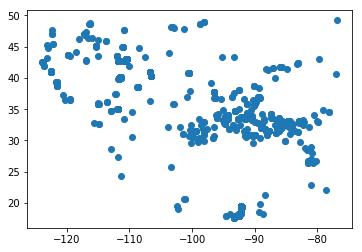

In [20]:
df.plot()

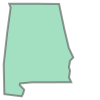

In [21]:
r = shpreader.Reader(states_shp)
records = r.records()

for record in records:
    if record.attributes['name'] == 'Alabama':
        alabama = record
        
alabama.geometry

In [22]:
mask = df.intersects(alabama.geometry)

mask.sum() / mask.count()

0.07483731019522777

In [23]:
df[mask].head(3)

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
103,31.155,-87.986,305.9,1.1,1.1,2018-09-17,0735,A,66,6.0NRT,295.1,6.6,N,POINT (-87.986 31.155)
104,30.945,-88.009,305.5,1.1,1.1,2018-09-17,0735,A,64,6.0NRT,295.2,6.1,N,POINT (-88.009 30.945)
166,34.234,-87.366,313.9,1.5,1.2,2018-09-17,1700,T,63,6.0NRT,292.6,13.6,D,POINT (-87.366 34.234)


In [24]:
filtered = df[mask].sort_values('CONFIDENCE', ascending=False)
filtered.head(3)

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,geometry
216,32.024,-85.839,367.6,2.0,1.4,2018-09-17,1700,T,100,6.0NRT,298.8,294.2,D,POINT (-85.839 32.024)
213,32.030,-85.853,365.0,2.0,1.4,2018-09-17,1700,T,100,6.0NRT,299.2,270.3,D,POINT (-85.85299999999999 32.03)
214,32.025,-85.832,352.7,2.0,1.4,2018-09-17,1700,T,97,6.0NRT,297.5,179.8,D,POINT (-85.83199999999999 32.025)


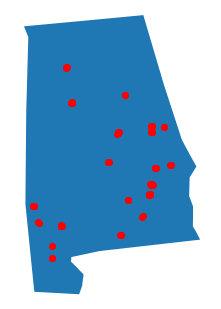

In [25]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.add_geometries([alabama.geometry], crs=ccrs.PlateCarree())

bounds = alabama.geometry.envelope.bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])

crs = ccrs.PlateCarree()
crs_proj4 = crs.proj4_init
ax.scatter(filtered['LONGITUDE'], filtered['LATITUDE'], transform=ccrs.Geodetic(), zorder=2, color='r')

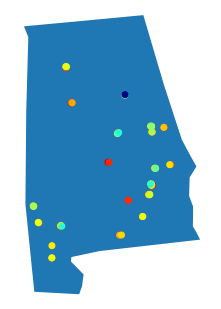

In [26]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)
ax.add_geometries([alabama.geometry], crs=ccrs.PlateCarree())

bounds = alabama.geometry.envelope.bounds
ax.set_extent([bounds[0], bounds[2], bounds[1], bounds[3]])

crs = ccrs.PlateCarree()
crs_proj4 = crs.proj4_init
ax.scatter(filtered['LONGITUDE'], filtered['LATITUDE'], transform=ccrs.Geodetic(), zorder=2, c=filtered['CONFIDENCE'], cmap=plt.cm.jet)

In [27]:
filtered.describe()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,CONFIDENCE,BRIGHT_T31,FRP
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,32.343101,-86.545899,324.069565,1.811594,1.318841,70.101449,296.414493,49.024638
std,0.826601,0.906979,13.748554,0.262643,0.094364,17.355407,1.939775,55.731239
min,30.943000,-88.294000,305.500000,1.100000,1.100000,0.000000,290.600000,6.100000
25%,31.861000,-87.325000,314.200000,1.600000,1.200000,61.000000,295.100000,16.500000
50%,32.047000,-86.197000,317.700000,1.800000,1.300000,68.000000,296.800000,28.500000
75%,32.999000,-85.842000,331.500000,2.000000,1.400000,82.000000,297.600000,57.800000
max,34.234000,-85.417000,367.600000,2.300000,1.500000,100.000000,300.800000,294.200000


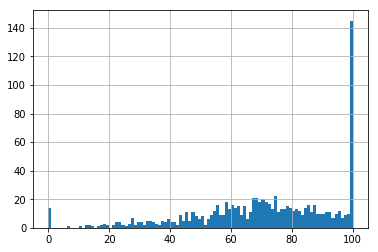

In [29]:
df['CONFIDENCE'].hist(bins=100)

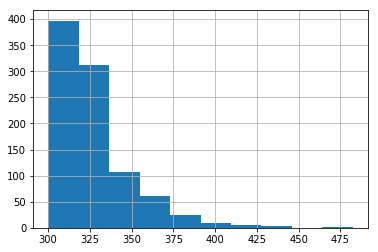

In [30]:
df['BRIGHTNESS'].hist()